# Openfoam - Large Motorbike Benchmark

Results from the openfoam CDF code for the semi-official large motorbike benchmark, documented [here](https://openfoamwiki.net/index.php/Benchmarks).

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML, Markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance. 

### Openfoam_Mbike: runtime_real

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx,alaska:[roce/ib]-gcc9-openmpi4-ucx,csd3:cclake-[roce/ib]-gcc9-ompi3-ucx
num_nodes,,,,,,
1,109.245,110.887,42.428,58.396,1.02,1.38
2,52.394,51.829,26.523,39.308,0.99,1.48
4,25.879,27.050,NaN,NaN,1.05,NaN
8,19.028,19.191,16.767,20.334,1.01,1.21
16,19.375,17.849,23.505,26.455,0.92,1.13
32,NaN,NaN,35.366,34.691,NaN,0.98
56,NaN,NaN,71.418,58.604,NaN,0.82


### Openfoam_Mbike: ExecutionTime

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx,alaska:[roce/ib]-gcc9-openmpi4-ucx,csd3:cclake-[roce/ib]-gcc9-ompi3-ucx
num_nodes,,,,,,
1,103.30,105.23,32.78,32.30,1.02,0.99
2,46.83,45.96,15.46,14.81,0.98,0.96
4,19.73,20.86,NaN,NaN,1.06,NaN
8,11.85,12.03,5.82,7.14,1.02,1.23
16,10.04,8.22,5.82,12.29,0.82,2.11
32,NaN,NaN,12.08,12.08,NaN,1.00
56,NaN,NaN,28.65,20.63,NaN,0.72


### Openfoam_Mbike: ClockTime

case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx,csd3:cclake-ib-gcc9-ompi3-ucx,csd3:cclake-roce-gcc9-ompi3-ucx,alaska:[roce/ib]-gcc9-openmpi4-ucx,csd3:cclake-[roce/ib]-gcc9-ompi3-ucx
num_nodes,,,,,,
1,104.0,105.0,33.0,33.0,1.01,1.00
2,47.0,46.0,16.0,15.0,0.98,0.94
4,20.0,21.0,NaN,NaN,1.05,NaN
8,13.0,12.0,6.0,8.0,0.92,1.33
16,10.0,10.0,6.0,13.0,1.00,2.17
32,NaN,NaN,14.0,13.0,NaN,0.93
56,NaN,NaN,32.0,24.0,NaN,0.75


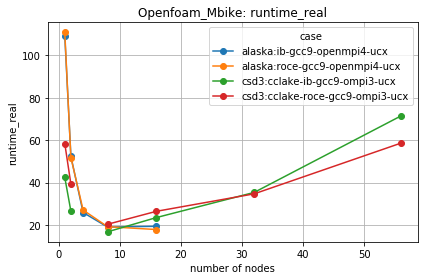

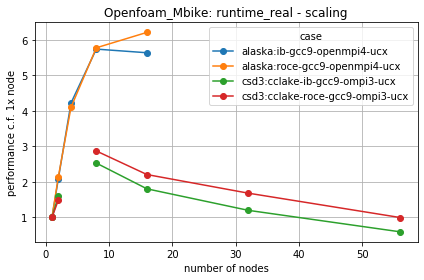

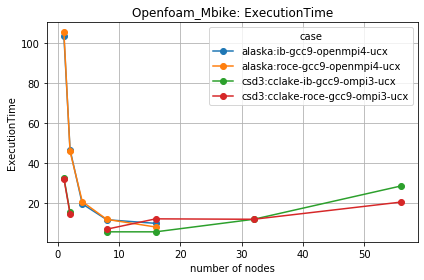

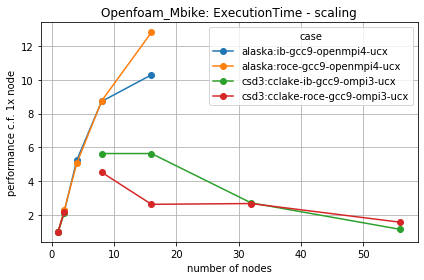

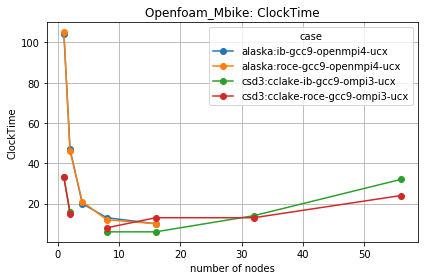

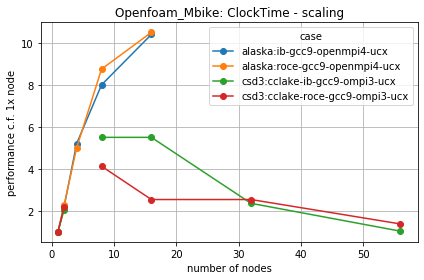

In [5]:
for perf_var in ['runtime_real', 'ExecutionTime', 'ClockTime']:
    df = modules.utils.tabulate_last_perf('Openfoam_Mbike_*', 'num_nodes', perf_var)
    title = 'Openfoam_Mbike: %s' % perf_var
    display(Markdown('### %s' % title))
    ax = df.plot(grid=True, style='o-', title=title)
    ax.set_xlabel('number of nodes')
    ax.set_ylabel(perf_var)
    plt.tight_layout()
    
    scaling = (df.iloc[0] / df)
    scaling_ax = scaling.plot(grid=True, style='o-',
                              title='%s - scaling' % title, xlabel='number of nodes', ylabel='performance c.f. 1x node')
    plt.tight_layout()
    
    modules.plots.add_roce_ib_factor(df)
    display(df)
    